In [2]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow import keras
from keras import layers, models

In [3]:
# unzip the files
! unzip /content/drive/MyDrive/aclImdb.zip -d /content/imdb

Streaming output truncated to the last 5000 lines.
  inflating: /content/imdb/__MACOSX/aclImdb/train/pos/._7754_9.txt  
  inflating: /content/imdb/aclImdb/train/pos/7755_9.txt  
  inflating: /content/imdb/__MACOSX/aclImdb/train/pos/._7755_9.txt  
  inflating: /content/imdb/aclImdb/train/pos/7756_10.txt  
  inflating: /content/imdb/__MACOSX/aclImdb/train/pos/._7756_10.txt  
  inflating: /content/imdb/aclImdb/train/pos/7757_9.txt  
  inflating: /content/imdb/__MACOSX/aclImdb/train/pos/._7757_9.txt  
  inflating: /content/imdb/aclImdb/train/pos/7758_7.txt  
  inflating: /content/imdb/__MACOSX/aclImdb/train/pos/._7758_7.txt  
  inflating: /content/imdb/aclImdb/train/pos/7759_10.txt  
  inflating: /content/imdb/__MACOSX/aclImdb/train/pos/._7759_10.txt  
  inflating: /content/imdb/aclImdb/train/pos/775_7.txt  
  inflating: /content/imdb/__MACOSX/aclImdb/train/pos/._775_7.txt  
  inflating: /content/imdb/aclImdb/train/pos/7760_10.txt  
  inflating: /content/imdb/__MACOSX/aclImdb/train/pos/._7

In [4]:
train_path = '/content/imdb/aclImdb/train'
test_path = '/content/imdb/aclImdb/test'

In [5]:
texts = []
labels = []

def prepare_data(path):
  """This is a function to prepare the dataset from the file location.
  :param path: this is the location of the dataset to extract texts/labels from - train/test
  """
  for category in ['neg', 'pos']:
    dir_name = os.path.join(path, category)  
    for filename in sorted(os.listdir(dir_name)):
      if filename[-4:] == '.txt':
        f = open(os.path.join(dir_name, filename), encoding='utf-8')
        texts.append(f.read())                
        f.close()
        
        # 0 for negative and 1 for positive
        if category == 'neg':
          labels.append(0)
        elif category == 'pos':
          labels.append(1)

In [6]:
prepare_data(path = train_path)

In [7]:
texts[0]

"Story of a man who has unnatural feelings for a pig. Starts out with a opening scene that is a terrific example of absurd comedy. A formal orchestra audience is turned into an insane, violent mob by the crazy chantings of it's singers. Unfortunately it stays absurd the WHOLE time with no general narrative eventually making it just too off putting. Even those from the era should be turned off. The cryptic dialogue would make Shakespeare seem easy to a third grader. On a technical level it's better than you might think with some good cinematography by future great Vilmos Zsigmond. Future stars Sally Kirkland and Frederic Forrest can be seen briefly."

In [8]:
labels[0]

0

In [9]:
len(texts)

25000

In [10]:
len(labels)

25000

In [11]:
texts

["Story of a man who has unnatural feelings for a pig. Starts out with a opening scene that is a terrific example of absurd comedy. A formal orchestra audience is turned into an insane, violent mob by the crazy chantings of it's singers. Unfortunately it stays absurd the WHOLE time with no general narrative eventually making it just too off putting. Even those from the era should be turned off. The cryptic dialogue would make Shakespeare seem easy to a third grader. On a technical level it's better than you might think with some good cinematography by future great Vilmos Zsigmond. Future stars Sally Kirkland and Frederic Forrest can be seen briefly.",
 "Airport '77 starts as a brand new luxury 747 plane is loaded up with valuable paintings & such belonging to rich businessman Philip Stevens (James Stewart) who is flying them & a bunch of VIP's to his estate in preparation of it being opened to the public as a museum, also on board is Stevens daughter Julie (Kathleen Quinlan) & her son.

## Using Tensorflow's Tokenizer

In [12]:
from tensorflow.keras.preprocessing.text import Tokenizer

max_words = 40000

tokenizer = Tokenizer(num_words = max_words, lower=True)

In [13]:
tokenizer.fit_on_texts(texts)

In [14]:
word_index = tokenizer.word_index
word_index

{'the': 1,
 'and': 2,
 'a': 3,
 'of': 4,
 'to': 5,
 'is': 6,
 'br': 7,
 'in': 8,
 'it': 9,
 'i': 10,
 'this': 11,
 'that': 12,
 'was': 13,
 'as': 14,
 'for': 15,
 'with': 16,
 'movie': 17,
 'but': 18,
 'film': 19,
 'on': 20,
 'not': 21,
 'you': 22,
 'are': 23,
 'his': 24,
 'have': 25,
 'he': 26,
 'be': 27,
 'one': 28,
 'all': 29,
 'at': 30,
 'by': 31,
 'an': 32,
 'they': 33,
 'who': 34,
 'so': 35,
 'from': 36,
 'like': 37,
 'her': 38,
 'or': 39,
 'just': 40,
 'about': 41,
 "it's": 42,
 'out': 43,
 'has': 44,
 'if': 45,
 'some': 46,
 'there': 47,
 'what': 48,
 'good': 49,
 'more': 50,
 'when': 51,
 'very': 52,
 'up': 53,
 'no': 54,
 'time': 55,
 'she': 56,
 'even': 57,
 'my': 58,
 'would': 59,
 'which': 60,
 'only': 61,
 'story': 62,
 'really': 63,
 'see': 64,
 'their': 65,
 'had': 66,
 'can': 67,
 'were': 68,
 'me': 69,
 'well': 70,
 'than': 71,
 'we': 72,
 'much': 73,
 'been': 74,
 'bad': 75,
 'get': 76,
 'will': 77,
 'do': 78,
 'also': 79,
 'into': 80,
 'people': 81,
 'other': 82,
 '

In [15]:
sequences = tokenizer.texts_to_sequences(texts)
len(sequences)

25000

In [16]:
# now let's pad the sequences to the same shape

from tensorflow.keras.preprocessing.sequence import pad_sequences

maxlen = 200 # pad each sequence to 200 dimensions
data = pad_sequences(sequences, maxlen = maxlen)
data

array([[    0,     0,     0, ...,    27,   107,  3348],
       [  342,   364,    16, ...,  4517, 34704,  5457],
       [    0,     0,     0, ...,  1906,    15,   620],
       ...,
       [  125,   130,    71, ...,  1110,   205,  9755],
       [    0,     0,     0, ...,  3713,    14,    70],
       [    0,     0,     0, ...,    82,    93,    36]], dtype=int32)

In [17]:
data[0]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,    62,
           4,     3,   129,    34,    44,  7576,  1414,    15,     3,
        4252,   514,    43,    16,     3,   633,   133,    12,     6,
           3,  1301,   459,     4,  1751,   209,     3, 10785,  7693,
         308,     6,   676,    80,    32,  2137,  1110,  3008,    31,
           1,   929,

In [18]:
texts[0]

"Story of a man who has unnatural feelings for a pig. Starts out with a opening scene that is a terrific example of absurd comedy. A formal orchestra audience is turned into an insane, violent mob by the crazy chantings of it's singers. Unfortunately it stays absurd the WHOLE time with no general narrative eventually making it just too off putting. Even those from the era should be turned off. The cryptic dialogue would make Shakespeare seem easy to a third grader. On a technical level it's better than you might think with some good cinematography by future great Vilmos Zsigmond. Future stars Sally Kirkland and Frederic Forrest can be seen briefly."

In [19]:
labels[0]

0

In [20]:
len(word_index)

88582

In [21]:
labels = np.array(labels)

In [22]:
# now, let's split the dataset
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(data, labels, shuffle=True, test_size=0.2, random_state=42)

In [23]:
len(X_train)

20000

In [24]:
X_train[0]

array([   18,     9,     6,    63,   734,    16,    29,     4,    91,
         834,  1394,     7,     7,     1,  3560,     4,     1,    19,
          23,   104,  1394,    36, 31691,     2, 34485,     8,     1,
       10209,     3,   375,     4,  1394,    16,  1852,  3648,   305,
        5154,  3456,  2278,     2,     1,  1615,   936,  4511, 18231,
        4511,    16,  1852,  3648,     2,  7736,  6578,    11,   233,
         609,     6,     1,    61,   170,     4,     1,    19,    12,
        6073,     8,  5111,     2,     9,    63,     6,   176,  1567,
        3724,   192,     1,  1843,     8,   131,    49,  1420,    68,
         193,  2878,  2975,  5624,   378,    35,   379,     1,   164,
         694,    86,     5,   294,     5,    65,  6249,   234,    26,
          13,  1076,    16,    95,     7,     7,    11,    19,  1420,
          14,     3, 17133,    30,    32,  1028,   210,     8,    19,
         476,     1,   288, 13506,    60,    13,     1,  3026,   288,
         197,   104,

In [25]:
y_train[0]

1

In [26]:
tokenizer.sequences_to_texts(X_train)

["but it is really enjoyable with all of its dance numbers br br the highlights of the film are two numbers from winnie and singin in the bathtub a couple of numbers with nick lucas john barrymore performing shakespeare and the chinese fantasy li po li with nick lucas and myrna loy this last number is the only part of the film that survives in technicolor and it really is quite attractive reasonably enough the players in these good acts were long term warner bros stars so perhaps the director knew how to play to their strengths since he was familiar with them br br this film acts as a snapshot at an odd point in film history the year 1929 which was the bridge year between two eras the silent and sound eras and the roaring 20's and the great depression just two years later this same film would have had an entirely different cast as warner bros would abandon its silent era stars and the stars they hired just to produce the early musicals in favor of those stars that gave warner bros its 

### Prepare the test set

In [27]:
# initialize empty lists for texts and labels

texts = []
labels = []

prepare_data(path = test_path)

In [28]:
len(texts)

25000

In [29]:
sequences = tokenizer.texts_to_sequences(texts)

In [30]:
sequences[0]

[277,
 171,
 440,
 11801,
 44,
 3318,
 43,
 3,
 17,
 15,
 227,
 1203,
 71,
 1668,
 1209,
 36,
 1,
 1301,
 2016,
 2225,
 842,
 4,
 60,
 47,
 23,
 52,
 168,
 10,
 40,
 119,
 21,
 456,
 41,
 98,
 4,
 1,
 102,
 88,
 4,
 175,
 25,
 2750,
 8,
 1,
 4229,
 2,
 24935,
 106,
 23,
 1704,
 399,
 20,
 2,
 92,
 1547,
 363,
 73,
 300,
 31,
 60,
 55,
 10,
 119,
 21,
 456,
 1,
 106,
 72,
 141,
 63,
 456,
 41,
 6,
 3,
 52,
 9290,
 33593,
 13323,
 15894,
 1,
 436,
 6,
 26,
 263,
 122,
 14,
 550,
 34,
 1287,
 237,
 125,
 71,
 256,
 331,
 184,
 87,
 2,
 284,
 54,
 4084,
 4,
 3,
 22048,
 4229,
 24,
 61,
 12103,
 735,
 5,
 27,
 1573,
 117,
 11801,
 414,
 51,
 72,
 23,
 70,
 498,
 1,
 317,
 93,
 210,
 4,
 11,
 4228,
 11801,
 713,
 175,
 29,
 41,
 2750,
 72,
 23,
 576,
 135,
 15894,
 6,
 2163,
 5,
 27,
 1,
 115,
 16,
 54,
 2593,
 16291,
 39,
 12063,
 54,
 1233,
 130,
 9,
 13,
 29,
 10,
 97,
 78,
 5,
 398,
 36,
 1583,
 9,
 122,
 32,
 531,
 8]

In [31]:
tokenizer.sequences_to_texts(sequences)

["once again mr costner has dragged out a movie for far longer than necessary aside from the terrific sea rescue sequences of which there are very few i just did not care about any of the characters most of us have ghosts in the closet and costner's character are realized early on and then forgotten until much later by which time i did not care the character we should really care about is a very cocky overconfident ashton kutcher the problem is he comes off as kid who thinks he's better than anyone else around him and shows no signs of a cluttered closet his only obstacle appears to be winning over costner finally when we are well past the half way point of this stinker costner tells us all about ghosts we are told why kutcher is driven to be the best with no prior inkling or foreshadowing no magic here it was all i could do to keep from turning it off an hour in",
 "this is an example of why the majority of action films are the same generic and boring there's really nothing worth watc

In [32]:
texts

["Once again Mr. Costner has dragged out a movie for far longer than necessary. Aside from the terrific sea rescue sequences, of which there are very few I just did not care about any of the characters. Most of us have ghosts in the closet, and Costner's character are realized early on, and then forgotten until much later, by which time I did not care. The character we should really care about is a very cocky, overconfident Ashton Kutcher. The problem is he comes off as kid who thinks he's better than anyone else around him and shows no signs of a cluttered closet. His only obstacle appears to be winning over Costner. Finally when we are well past the half way point of this stinker, Costner tells us all about Kutcher's ghosts. We are told why Kutcher is driven to be the best with no prior inkling or foreshadowing. No magic here, it was all I could do to keep from turning it off an hour in.",
 "This is an example of why the majority of action films are the same. Generic and boring, ther

In [33]:
# let's pad the sequences to the same length

data = pad_sequences(sequences, maxlen= maxlen)

In [34]:
X_test = np.array(data)
y_test = np.array(labels)

### ML Models

#### Model 1

In [35]:
X_train.shape

(20000, 200)

In [36]:
embedding_dim = 100

In [37]:
model = models.Sequential()
model.add(layers.Embedding(input_dim = max_words, output_dim = embedding_dim, input_length = maxlen))
model.add(layers.Flatten())
model.add(layers.Dropout(0.4))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 100)          4000000   
                                                                 
 flatten (Flatten)           (None, 20000)             0         
                                                                 
 dropout (Dropout)           (None, 20000)             0         
                                                                 
 dense (Dense)               (None, 32)                640032    
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,640,065
Trainable params: 4,640,065
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [40]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("imdb_1.h5", save_best_only=True)

In [41]:
history = model.fit(X_train, y_train, epochs = 5 ,batch_size=32,  validation_data=(X_valid, y_valid), validation_steps = 50)

Epoch 1/5
625/625 [==============================] - 40s 63ms/step - loss: 0.4304 - accuracy: 0.7853 - val_loss: 0.2834 - val_accuracy: 0.8888
Epoch 2/5
625/625 [==============================] - 41s 65ms/step - loss: 0.0778 - accuracy: 0.9748 - val_loss: 0.3403 - val_accuracy: 0.8763
Epoch 3/5
625/625 [==============================] - 39s 62ms/step - loss: 0.0114 - accuracy: 0.9972 - val_loss: 0.4073 - val_accuracy: 0.8750
Epoch 4/5
625/625 [==============================] - 38s 62ms/step - loss: 0.0028 - accuracy: 0.9996 - val_loss: 0.4912 - val_accuracy: 0.8725
Epoch 5/5
625/625 [==============================] - 40s 64ms/step - loss: 0.0018 - accuracy: 0.9996 - val_loss: 0.5088 - val_accuracy: 0.8706


In [42]:
model.evaluate(X_test, y_test)

782/782 [==============================] - 3s 3ms/step - loss: 0.5736 - accuracy: 0.8591


[0.5736256837844849, 0.8590800166130066]

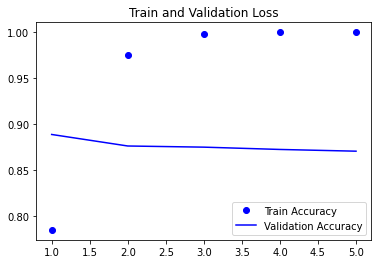

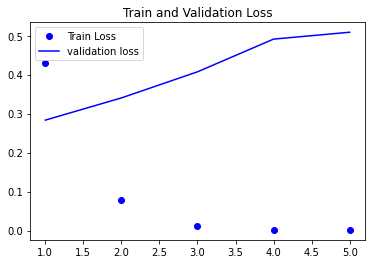

In [43]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()
plt.plot(epochs, acc, 'bo', label='Train Accuracy')
plt.plot(epochs, val_acc, 'b-', label = 'Validation Accuracy')
plt.title('Train and Validation Loss')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label ='Train Loss')
plt.plot(epochs, val_loss, 'b-', label = 'validation loss')
plt.title('Train and Validation Loss')
plt.legend()


plt.show()

### Model 2

In [44]:
model = models.Sequential()
model.add(layers.Embedding(input_dim = max_words, output_dim = embedding_dim, input_length = maxlen))
model.add(layers.Conv1D(64, 7, padding= 'valid', activation='relu'))
model.add(layers.Conv1D(64, 7, padding='valid', activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [45]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("imdb_2.h5", save_best_only=True)

In [46]:
history = model.fit(X_train, y_train, epochs = 5 ,batch_size=32,  validation_data=(X_valid, y_valid), validation_steps = 50)

Epoch 1/5
625/625 [==============================] - 84s 134ms/step - loss: 0.4365 - accuracy: 0.7772 - val_loss: 0.3290 - val_accuracy: 0.8600
Epoch 2/5
625/625 [==============================] - 84s 134ms/step - loss: 0.1892 - accuracy: 0.9272 - val_loss: 0.3132 - val_accuracy: 0.8706
Epoch 3/5
625/625 [==============================] - 84s 134ms/step - loss: 0.0545 - accuracy: 0.9829 - val_loss: 0.4265 - val_accuracy: 0.8669
Epoch 4/5
625/625 [==============================] - 85s 136ms/step - loss: 0.0133 - accuracy: 0.9961 - val_loss: 0.5763 - val_accuracy: 0.8669
Epoch 5/5
625/625 [==============================] - 85s 136ms/step - loss: 0.0088 - accuracy: 0.9975 - val_loss: 0.6526 - val_accuracy: 0.8675


In [47]:
model.evaluate(X_test, y_test)

782/782 [==============================] - 17s 22ms/step - loss: 0.7158 - accuracy: 0.8523


[0.7158133387565613, 0.8523200154304504]

## Model 3

In [48]:
model = models.Sequential()
model.add(layers.Embedding(max_words, output_dim = embedding_dim, input_length = maxlen))
model.add(layers.LSTM(32, dropout=0.2, recurrent_dropout=0.2, return_sequences=False))
model.add(layers.Dense(1, activation='sigmoid'))

In [49]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 200, 100)          4000000   
                                                                 
 lstm (LSTM)                 (None, 32)                17024     
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,017,057
Trainable params: 4,017,057
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("imdb_3.h5", save_best_only=True)

In [51]:
history = model.fit(X_train, y_train, epochs = 5 ,batch_size=32,  validation_data=(X_valid, y_valid), validation_steps = 50)

Epoch 1/5
625/625 [==============================] - 184s 291ms/step - loss: 0.4138 - accuracy: 0.8099 - val_loss: 0.2962 - val_accuracy: 0.8831
Epoch 2/5
625/625 [==============================] - 146s 233ms/step - loss: 0.2026 - accuracy: 0.9252 - val_loss: 0.3531 - val_accuracy: 0.8612
Epoch 3/5
625/625 [==============================] - 144s 231ms/step - loss: 0.1194 - accuracy: 0.9589 - val_loss: 0.3504 - val_accuracy: 0.8775
Epoch 4/5
625/625 [==============================] - 145s 232ms/step - loss: 0.0775 - accuracy: 0.9750 - val_loss: 0.3716 - val_accuracy: 0.8775
Epoch 5/5
625/625 [==============================] - 144s 230ms/step - loss: 0.0858 - accuracy: 0.9714 - val_loss: 0.5534 - val_accuracy: 0.8306


In [52]:
model.evaluate(X_test, y_test)

782/782 [==============================] - 23s 29ms/step - loss: 0.5848 - accuracy: 0.8204


[0.5847557187080383, 0.820360004901886]

### Using Pretrained Embeddings

In [53]:
! pip install kaggle # install kaggle
! mkdir ~/.kaggle # make the kaggle directory
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/ # copy the json file to directory
! chmod 600 ~/.kaggle/kaggle.json # allocate the required permission

In [54]:
# download the glove pretrained embedding

! kaggle datasets download -d danielwillgeorge/glove6b100dtxt

 96% 126M/131M [00:01<00:00, 118MB/s]
100% 131M/131M [00:01<00:00, 118MB/s]


In [55]:
! unzip /content/glove6b100dtxt.zip -d /content/imdb

Archive:  /content/glove6b100dtxt.zip
  inflating: /content/imdb/glove.6B.100d.txt  


In [56]:
glove_path = '/content/imdb/glove.6B.100d.txt'

embeddings_index = {}
f = open(glove_path)

for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

print(f'Words Found {len(embeddings_index)}')

Words Found 400000


In [57]:
embeddings_index

{'the': array([-0.038194, -0.24487 ,  0.72812 , -0.39961 ,  0.083172,  0.043953,
        -0.39141 ,  0.3344  , -0.57545 ,  0.087459,  0.28787 , -0.06731 ,
         0.30906 , -0.26384 , -0.13231 , -0.20757 ,  0.33395 , -0.33848 ,
        -0.31743 , -0.48336 ,  0.1464  , -0.37304 ,  0.34577 ,  0.052041,
         0.44946 , -0.46971 ,  0.02628 , -0.54155 , -0.15518 , -0.14107 ,
        -0.039722,  0.28277 ,  0.14393 ,  0.23464 , -0.31021 ,  0.086173,
         0.20397 ,  0.52624 ,  0.17164 , -0.082378, -0.71787 , -0.41531 ,
         0.20335 , -0.12763 ,  0.41367 ,  0.55187 ,  0.57908 , -0.33477 ,
        -0.36559 , -0.54857 , -0.062892,  0.26584 ,  0.30205 ,  0.99775 ,
        -0.80481 , -3.0243  ,  0.01254 , -0.36942 ,  2.2167  ,  0.72201 ,
        -0.24978 ,  0.92136 ,  0.034514,  0.46745 ,  1.1079  , -0.19358 ,
        -0.074575,  0.23353 , -0.052062, -0.22044 ,  0.057162, -0.15806 ,
        -0.30798 , -0.41625 ,  0.37972 ,  0.15006 , -0.53212 , -0.2055  ,
        -1.2526  ,  0.071624,  

In [58]:
# let's initialize an empty embedding matrix of shape (vocab_size, embedding_dim)

embeddings_matrix = np.zeros((max_words, embedding_dim))

# for each word tokenized

for word, i in word_index.items():
  if i < max_words:
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
      embeddings_matrix[i] = embedding_vector

In [59]:
embeddings_matrix.shape

(40000, 100)

In [75]:
model = models.Sequential()
model.add(layers.Embedding(input_dim = max_words, output_dim = embedding_dim, input_length = maxlen))
model.add(layers.LSTM(32, dropout=0.2, recurrent_dropout=0.2, return_sequences=False))
model.add(layers.Dense(1, activation='sigmoid'))

In [76]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 200, 100)          4000000   
                                                                 
 lstm_2 (LSTM)               (None, 32)                17024     
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,017,057
Trainable params: 4,017,057
Non-trainable params: 0
_________________________________________________________________


In [77]:
model.layers[0].set_weights([embeddings_matrix])
model.layers[0].trainable = False

In [78]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 200, 100)          4000000   
                                                                 
 lstm_2 (LSTM)               (None, 32)                17024     
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,017,057
Trainable params: 17,057
Non-trainable params: 4,000,000
_________________________________________________________________


In [79]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("imdb_4.h5", save_best_only=True)

In [80]:
history = model.fit(X_train, y_train, epochs = 15 ,batch_size=32,  validation_data=(X_valid, y_valid), validation_steps = 50,
                    callbacks=[early_stopping_cb, checkpoint_cb])

Epoch 1/15
625/625 [==============================] - 105s 164ms/step - loss: 0.5845 - accuracy: 0.6907 - val_loss: 0.5514 - val_accuracy: 0.7506
Epoch 2/15
625/625 [==============================] - 100s 160ms/step - loss: 0.4591 - accuracy: 0.7869 - val_loss: 0.4092 - val_accuracy: 0.8100
Epoch 3/15
625/625 [==============================] - 100s 161ms/step - loss: 0.4008 - accuracy: 0.8188 - val_loss: 0.3683 - val_accuracy: 0.8406
Epoch 4/15
625/625 [==============================] - 101s 162ms/step - loss: 0.3674 - accuracy: 0.8393 - val_loss: 0.3442 - val_accuracy: 0.8556
Epoch 5/15
625/625 [==============================] - 101s 162ms/step - loss: 0.3444 - accuracy: 0.8481 - val_loss: 0.3157 - val_accuracy: 0.8744
Epoch 6/15
625/625 [==============================] - 101s 161ms/step - loss: 0.3297 - accuracy: 0.8568 - val_loss: 0.3116 - val_accuracy: 0.8744
Epoch 7/15
625/625 [==============================] - 101s 162ms/step - loss: 0.3257 - accuracy: 0.8580 - val_loss: 0.3408 -

In [81]:
model.evaluate(X_test, y_test)

782/782 [==============================] - 24s 30ms/step - loss: 0.2800 - accuracy: 0.8826


[0.2799992859363556, 0.88264000415802]

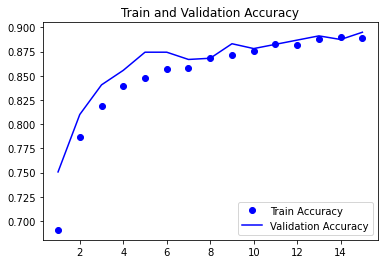

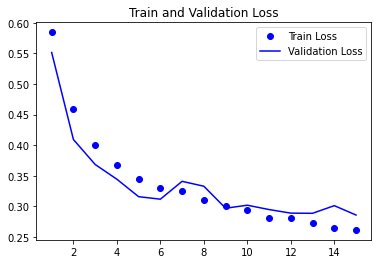

In [82]:
# let's plot

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()
plt.plot(epochs, accuracy, 'bo', label='Train Accuracy')
plt.plot(epochs, val_accuracy, 'b-', label ='Validation Accuracy')
plt.title('Train and Validation Accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Train Loss')
plt.plot(epochs, val_loss, 'b-', label = 'Validation Loss')
plt.title('Train and Validation Loss')
plt.legend()


plt.show()

In [83]:
model.save('imdb_4.h5')

In [84]:
! cp /content/imdb_4.h5 /content/drive/MyDrive

## Test 

In [85]:
reviews = ["""
I'm from the uk so we don't really do all that kind of cheering in cinemas. But oh my god. I've never seen anything like it there were so many moments during this film where the cinema just exploded, pure excitement coming from almost everyone, including me.
Even though it was quite bittersweet i cannot wait to watch this movie again, this is a top 3 mcu movie.
The score was just fantastic, acting amazing, even the small bits of fan service just put a smile on my face. There's not much else i can say about this film, except how excited it's made me for the future of the mcu.
""", 
"""
This was probably the worst movie I've ever seen. The dialogues between the main characters are unbelievably cringy and the plot literally doesn't make any sense. Don't watch this movie unless you wanna waste 2 hours of your life just to give this movie a (probably) 1 star rating too.
""", 
"""
At first I really don't care what this series. It doesn't look that good to me. And another thing; it got very cliché story something to do with the high school and the kids that good at Basketball. After watch it, I found out it is a little better than I thought. The good things are the show get more deeper and more substance later-on
""", 
"""
Parasite really is the kind of remarkable experience that makes modern movie‑going/Binge‑watching such a joy. South Korean filmmaker Bong Joon‑ho already has an impeccable track record, but he's stepped up his game with this brilliant, powerfully ...
"""
]

In [86]:
sequence = tokenizer.texts_to_sequences(reviews)

In [87]:
sequence

[[143,
  36,
  1,
  2286,
  35,
  72,
  89,
  63,
  78,
  29,
  12,
  240,
  4,
  7851,
  8,
  6111,
  18,
  446,
  58,
  556,
  204,
  112,
  107,
  229,
  37,
  9,
  47,
  68,
  35,
  108,
  385,
  312,
  11,
  19,
  118,
  1,
  435,
  40,
  13048,
  1047,
  2315,
  579,
  36,
  217,
  313,
  583,
  69,
  57,
  148,
  9,
  13,
  176,
  7636,
  10,
  563,
  855,
  5,
  103,
  11,
  17,
  171,
  11,
  6,
  3,
  347,
  339,
  17,
  1,
  600,
  13,
  40,
  774,
  113,
  477,
  57,
  1,
  389,
  1796,
  4,
  334,
  2469,
  40,
  273,
  3,
  1825,
  20,
  58,
  390,
  222,
  21,
  73,
  331,
  10,
  67,
  132,
  41,
  11,
  19,
  546,
  86,
  2228,
  42,
  90,
  69,
  15,
  1,
  702,
  4,
  1],
 [11,
  13,
  239,
  1,
  246,
  17,
  204,
  123,
  107,
  1,
  3953,
  197,
  1,
  290,
  102,
  23,
  3804,
  2,
  1,
  111,
  1225,
  149,
  94,
  98,
  278,
  89,
  103,
  11,
  17,
  891,
  22,
  3029,
  434,
  238,
  631,
  4,
  126,
  110,
  40,
  5,
  199,
  11,
  17,
  3,
  239,
  297,
  3

In [88]:
test = pad_sequences(sequence, maxlen)

In [90]:
prediction = model.predict(test)

In [91]:
prediction

array([[0.97885007],
       [0.00540093],
       [0.41535348],
       [0.9773108 ]], dtype=float32)

In [92]:
prediction = [item for sublist in prediction for item in sublist]
prediction

[0.97885007, 0.005400926, 0.41535348, 0.9773108]

In [93]:
class_predict = []
for i in prediction:
  if i < 0.5:
    class_predict.append(0)
  else:
    class_predict.append(1)

class_predict = [i for i in class_predict]
class_predict

[1, 0, 0, 1]